# Il Dataset 

Il datataset  weather_train.csv  (preso da kaggle --  https://www.kaggle.com/nicholasjhana/energy-
consumption-generation-prices-and-weather)  contiene  dati  relativi  a  rilevazioni  meteo  registrate 
in città spagnole una volta al giorno secondo il seguente schema: 
'dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 
'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', ‘clouds_all', 'weather_id', 'weather_main', 
'weather_description',  'weather_icon' 
Il dataset è costituito da attributi con valori numerici e categorici.  
L’obiettivo  è quello di  prevedere  il  tempo  complessivo  di  una  giornata  (valore della  feature 
'weather_main') sulla base degli altri parametri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os



# Parte 1: Analisi
1.  Quante  sono  le  istanze contenute  nel dataset?  _______  Il dataset  è  completo  (cioè per  ogni 
istanza tutti i valori di attributo sono sempre  correttamente  specificati –  non esistono “missing 
values”)? _______    Il  dataset  è  bilanciato  per  quanto  riguarda  la  classe  da  predire?  _________ 
(punti 1)

In [3]:
df = pd.read_csv("weather_train.csv")
df.head(3)

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158131 entries, 0 to 158130
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               158131 non-null  object 
 1   city_name            158131 non-null  object 
 2   temp                 158131 non-null  float64
 3   temp_min             158131 non-null  float64
 4   temp_max             158131 non-null  float64
 5   pressure             158131 non-null  int64  
 6   humidity             158131 non-null  int64  
 7   wind_speed           158131 non-null  int64  
 8   wind_deg             158131 non-null  int64  
 9   rain_1h              158131 non-null  float64
 10  rain_3h              158131 non-null  float64
 11  snow_3h              158131 non-null  float64
 12  clouds_all           158131 non-null  int64  
 13  weather_id           158131 non-null  int64  
 14  weather_main         158131 non-null  object 
 15  weather_descripti

In [5]:
#conto numero di righe e colonne
print("il dataset è composto da: ", df.shape[0], "istanze, ognuna con ", df.shape[1], "attributi")

il dataset è composto da:  158131 istanze, ognuna con  17 attributi


In [6]:
df.isnull().sum() # per vedere se ci sono valori nulli

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [7]:
classes = df['weather_main'].unique() # per vedere i valori unici
print(classes)

['clouds' 'clear' 'rain']


In [8]:
df['weather_main'].value_counts() # per vedere la frequenza dei valori

clear     77750
clouds    64130
rain      16251
Name: weather_main, dtype: int64

il dataset è sbilanciato in quanto i valori possibili per l'attributo del dataset non sono equamente distribuiti, ovvero compaiono con una frequenza diversa. Questo andrà ad impattare sulla fase di training del modello, in quanto il modello tenderà a predire più spesso la classi più frequenti, avendo più esempi per imparare a classificarla.

2. Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni? 
Eliminarle dal dataset (punti 1)

In [9]:
press=df.loc[df['pressure']==0]# per vedere quante righe hanno il valore 0
hum= df.loc[df['humidity']==0] # per vedere quante righe hanno il valore 0


In [10]:
press.head()



,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
1271,2015-02-22 20:00:00+01:00,Barcelona,285.57,285.57,285.57,0,4,1,22,0.0,0.0,0.0,0,800,clear,sky is clear,01n
28084,2015-02-22 21:00:00+01:00,Barcelona,283.55,283.55,283.55,0,4,1,157,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [11]:
hum.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
5564,2015-02-22 01:00:00+01:00,Barcelona,281.65,281.65,281.65,100064,0,3,67,0.0,0.0,0.0,0,800,clear,sky is clear,01n
16489,2015-02-21 14:00:00+01:00,Barcelona,283.85,283.85,283.85,99915,0,1,0,0.9,0.0,0.0,88,501,rain,moderate rain,10d
19646,2015-02-22 11:00:00+01:00,Barcelona,285.05,285.05,285.05,100304,0,6,67,0.0,0.0,0.0,0,800,clear,sky is clear,01d
26268,2015-02-22 03:00:00+01:00,Barcelona,273.37,273.37,273.37,1000,0,1,315,0.0,0.0,0.0,20,801,clouds,few clouds,02n
28206,2015-02-21 11:00:00+01:00,Barcelona,274.65,274.65,274.65,1000951,0,2,337,0.3,0.0,0.0,92,500,rain,light rain,10d


In [12]:
print("il numero di righe con pressione 0 è: ", press.shape[0], "mentre il numero di righe con umidità 0 è: ", hum.shape[0])


il numero di righe con pressione 0 è:  2 mentre il numero di righe con umidità 0 è:  59


In [13]:
# elimino le righe con pressione 0
print("il dataset prima di eliminare le righe con pressione 0 è composto da: ", df.shape[0], "righe")
df = df.drop(press.index)
print("il dataset eliminando le righe con pressione 0 è composto da: ", df.shape[0], "righe")
df = df.drop(hum.index)
print("il dataset eliminando le righe con umidità 0 è composto da: ", df.shape[0], "righe")


il dataset prima di eliminare le righe con pressione 0 è composto da:  158131 righe
il dataset eliminando le righe con pressione 0 è composto da:  158129 righe
il dataset eliminando le righe con umidità 0 è composto da:  158070 righe


3. Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un 
andamento simile a una gaussiana. 

In [14]:
len(df['temp']) # per vedere il numero di righe

158070

la media della temperatura è:  289.9039472998513
la mediana della temperatura è:  289.33
la deviazione standard della temperatura è:  7.999176719034097


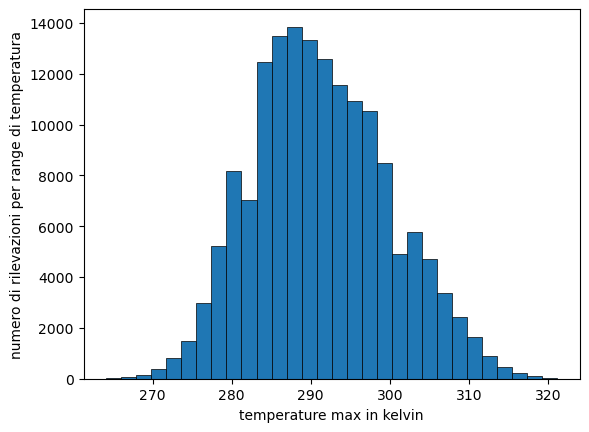

In [15]:
temp_hist = df['temp_max'].hist(bins=30, linewidth=0.5, edgecolor='black', grid=False)
plt.xlabel('temperature max in kelvin')
plt.ylabel('numero di rilevazioni per range di temperatura')
#media della temperatura
print("la media della temperatura è: ", df['temp'].mean())
#mediana della temperatura
print("la mediana della temperatura è: ", df['temp'].median())
#deviazione standard della temperatura
print("la deviazione standard della temperatura è: ", df['temp'].std())



La distribuzione dei valori della temperatura massima rilevata assume un andamento simile a una gaussiana.
______________________________________________________________________________________
# Inciso:
Per calcolare la deviazione standard si usa la formula:

$$\sigma = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(x_i - \mu)^2}$$

dove gli $x_i$ sono i valori della temperatura, $\mu$ è il valor medio della temperatura e $N$ è il numero di rilevazioni.


_______________________________________________________________________________________

3.1. Considerare poi le rilevazioni che si collocano all’interno del 
5% delle temperature più alte.  Le città sono equamente presenti in quella fascia di rilevazioni? 


______________________________________________________________________________________
# Inciso:
Un quantile è una misura statistica che divide un insieme di dati in gruppi o sottogruppi, in base alla loro posizione relativa all'interno della distribuzione dei dati. I quantili sono spesso utilizzati per suddividere i dati in percentili, quartili o decili.

In generale, un quantile rappresenta il valore corrispondente a una determinata posizione percentuale nella distribuzione dei dati. Ad esempio, il 25° percentile è il valore al di sotto del quale si trova il 25% dei dati. In altre parole, il 25% dei dati è inferiore al valore del 25° percentile.

I quartili sono un esempio comune di quantili e suddividono i dati in quattro gruppi uguali. Il primo quartile (Q1) corrisponde al 25° percentile, il secondo quartile (Q2) corrisponde al 50° percentile (che coincide con la mediana) e il terzo quartile (Q3) corrisponde al 75° percentile.

I quantili sono utili per comprendere la distribuzione dei dati e per identificare i valori che si trovano al di sopra o al di sotto di una determinata soglia. Possono essere utilizzati anche per analisi comparative, ad esempio confrontando la posizione di un dato rispetto alla distribuzione generale di un insieme di dati."
_______________________________________________________________________________________

In [16]:
df['temp_max'].quantile(0.95) # valore del 95 qauntile della temperatura massima

306.15

In [17]:
#seleziono le righe con temperatura massima maggiore del 95 quantile 
df.loc[df['temp_max'] > df['temp_max'].quantile(0.95)] # 

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
28,2016-07-21 20:00:00+02:00,Madrid,308.150,308.150,308.150,1013,12,3,210,0.0,0.0,0.0,0,800,clear,sky is clear,01d
34,2016-05-29 14:00:00+02:00,Seville,301.050,294.150,312.150,1020,43,3,260,0.0,0.0,0.0,20,801,clouds,few clouds,02d
39,2015-05-12 17:00:00+02:00,Madrid,306.249,306.249,306.249,961,26,2,221,0.0,0.0,0.0,0,800,clear,sky is clear,01d
50,2016-06-24 18:00:00+02:00,Barcelona,300.290,296.480,307.040,1017,69,6,210,3.0,0.0,0.0,0,502,rain,heavy intensity rain,10d
65,2016-09-12 19:00:00+02:00,Seville,305.960,304.150,307.150,1011,48,6,250,0.0,0.0,0.0,0,800,clear,sky is clear,01d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158070,2017-04-10 09:00:00+02:00,Seville,293.820,283.150,309.150,1020,67,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158081,2015-07-22 15:00:00+02:00,Seville,312.370,310.150,315.150,1014,19,2,310,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158099,2015-08-06 18:00:00+02:00,Madrid,309.940,307.950,311.480,1014,9,5,200,0.0,0.0,0.0,20,801,clouds,few clouds,02d
158105,2015-07-03 13:00:00+02:00,Barcelona,303.620,296.480,308.710,1023,51,4,100,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [18]:
#5% dei valori
print("dataframe delle rilevazioni che si collocano all’interno del 5% delle temperature più alte")
tempMax5x100 = df[df['temp_max'] > df['temp_max'].quantile(0.95)]
print(tempMax5x100.shape)
print("frequenza delle rilevazioni che si collocano all’interno del 5% delle temperature più alte per ogni città")
tempMax5x100.groupby('city_name').size() # per vedere la frequenza dei valori raggruppati per città
# tempMax5x100.groupby('city_name').value_counts() # mostra le righe del dataframe raggruppate per città e ordinate per frequenza
# tempMax5x100['city_name'].value_counts() # per vedere la frequenza dei valori raggruppati per città

dataframe delle rilevazioni che si collocano all’interno del 5% delle temperature più alte
(7777, 17)
frequenza delle rilevazioni che si collocano all’interno del 5% delle temperature più alte per ogni città


city_name
 Barcelona     539
Bilbao         346
Madrid        1804
Seville       4557
Valencia       531
dtype: int64

<Axes: title={'center': 'frequenza delle rilevazioni che si collocano all’interno del 5% delle temperature più alte per ogni città'}>

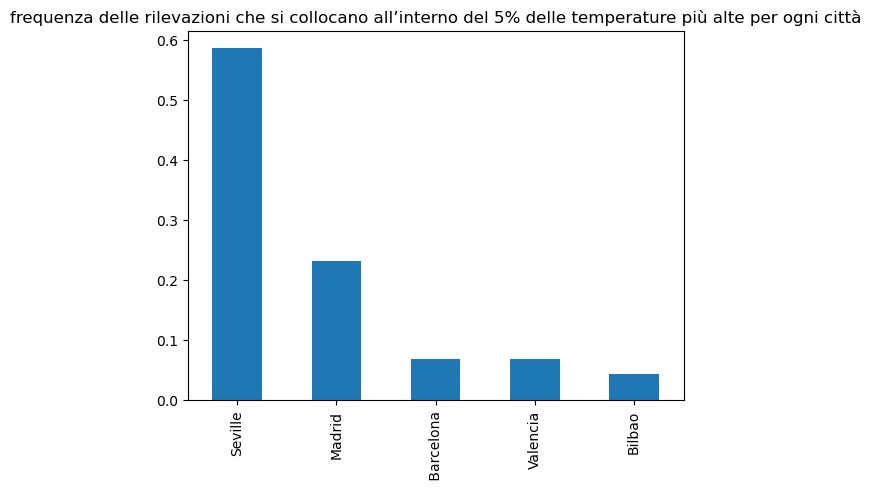

In [19]:
tempMax5x100['city_name'].value_counts(normalize=True).plot(kind='bar', title='frequenza delle rilevazioni che si collocano all’interno del 5% delle temperature più alte per ogni città')
 # per vedere la frequenza dei valori raggruppati per città in un grafico a barre

<Axes: title={'center': 'frequenza delle rilevazioni che si collocano all’interno del 5% delle temperature più alte per ogni città'}, xlabel='city_name'>

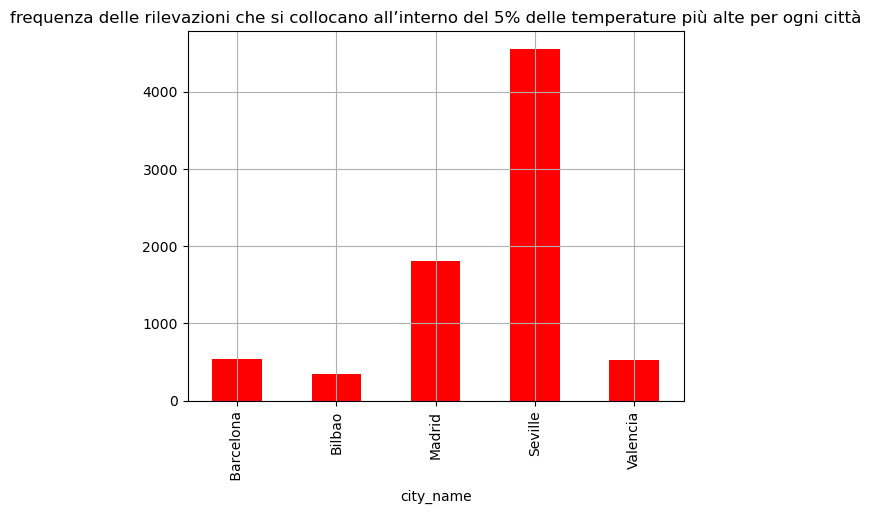

In [20]:
tempMax5x100.groupby('city_name').size().plot(kind='bar', color='red', title='frequenza delle rilevazioni che si collocano all’interno del 5% delle temperature più alte per ogni città', grid=True)

3.2. Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni 
città? (punti 4)

per farlo ho raggruppato il dataframe che contiene le rilevazioni 

In [21]:
# faccio un pivot table in cui le riche sono le città e le colonne sono i weather_main
# fa la stessa roba di groupby ma trasforma già in un dataframe
weather_cities = tempMax5x100.pivot_table(index='city_name', columns='weather_main', aggfunc='size', fill_value=0)
weather_cities

weather_main,clear,clouds,rain
city_name,,,
Barcelona,267,246,26
Bilbao,195,148,3
Madrid,1427,363,14
Seville,3856,581,120
Valencia,279,250,2


In [22]:
import seaborn as sns

<Axes: xlabel='city_name', ylabel='count'>

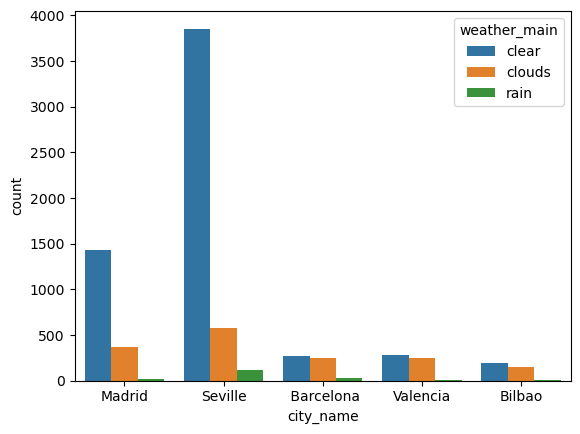

In [23]:
sns.countplot(tempMax5x100, x = 'city_name', hue='weather_main')


la partre seguente fa la stessa roba dell'usare una pivot table per relazionare due colonne del dataframe, con un countplot

weather_main  clear  clouds  rain
city_name                        
 Barcelona      267     246    26
Bilbao          195     148     3
Madrid         1427     363    14
Seville        3856     581   120
Valencia        279     250     2
[' Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']


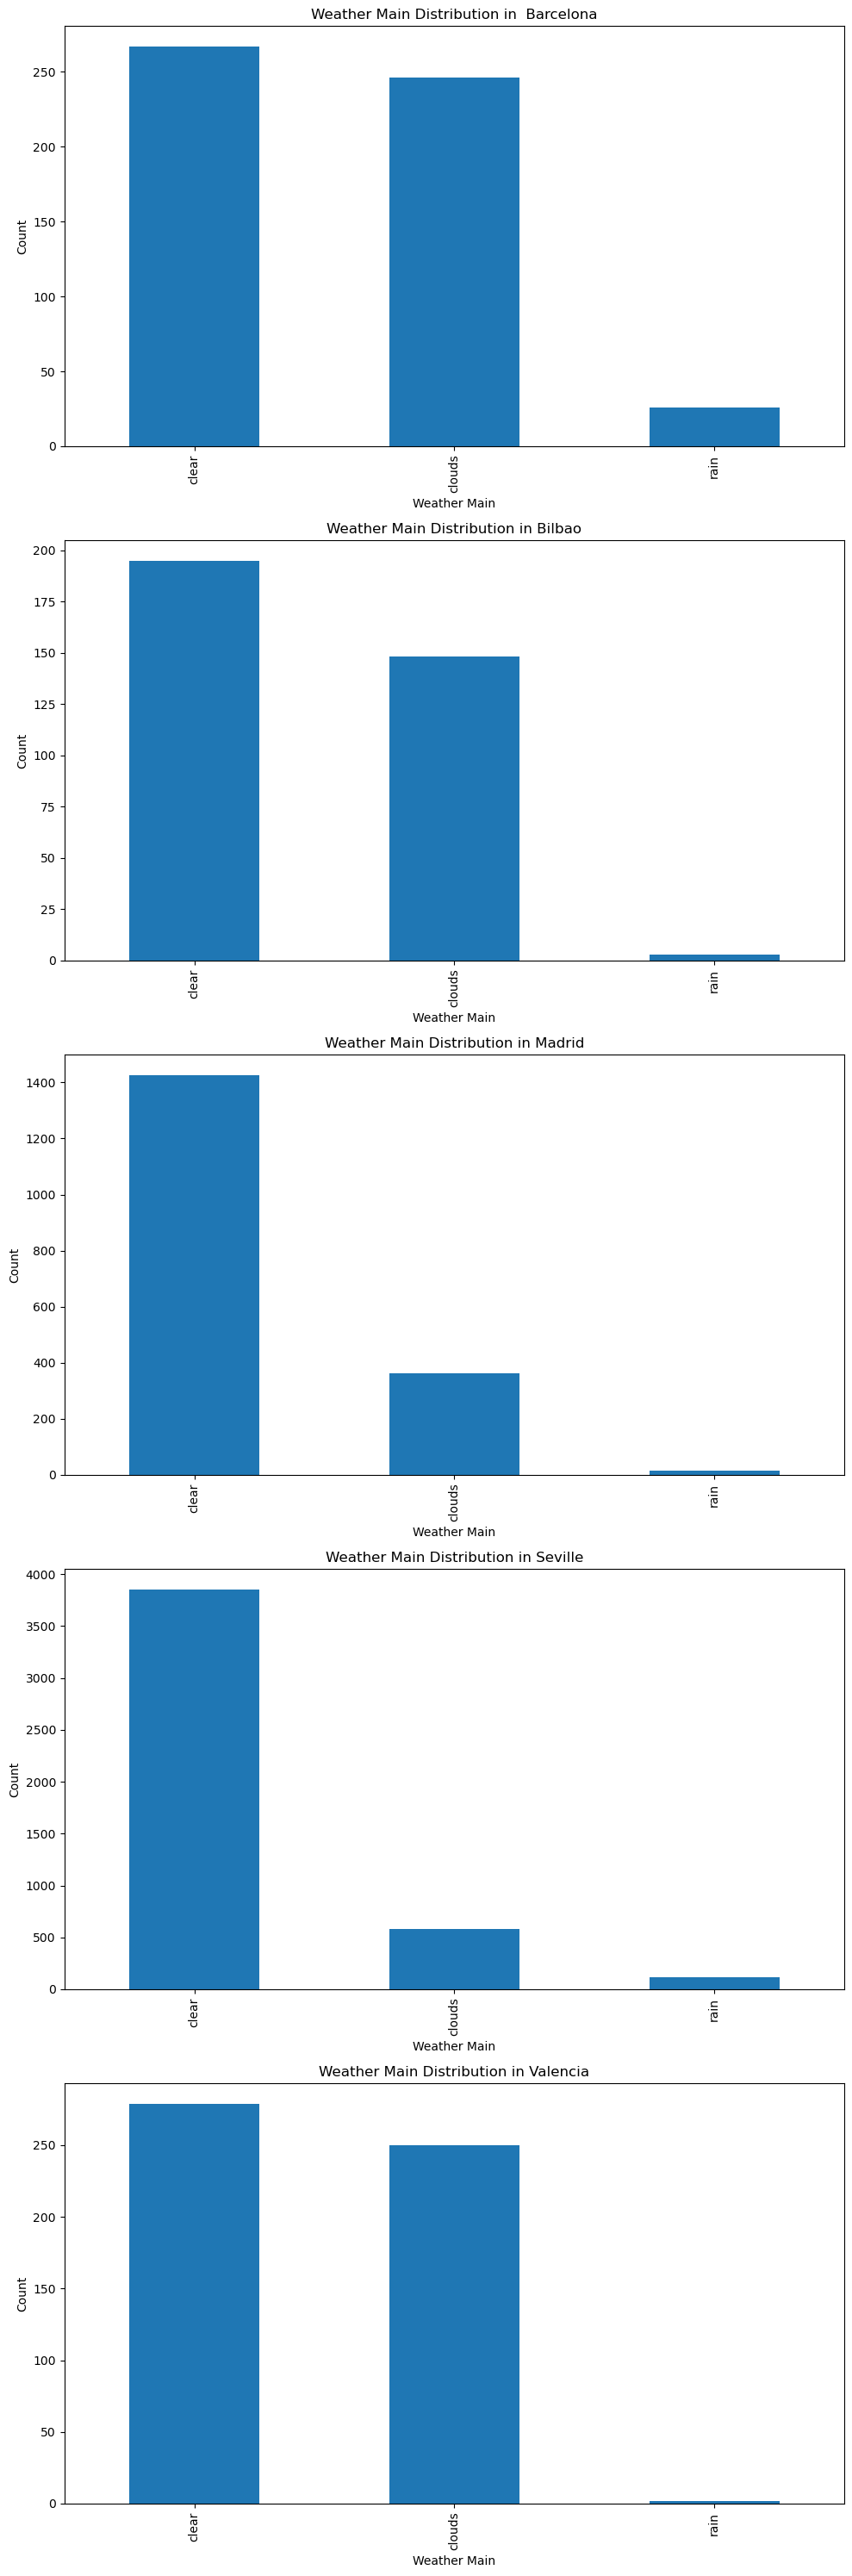

In [24]:
# tempMax5x100.groupby('city_name')['weather_main'].value_counts()
# #4 grafici separati per città
# data = tempMax5x100.groupby('city_name')['weather_main'].value_counts().unstack().replace(np.nan, 0)
# print(data)
# #4 grafici separati per città
# cities = data.index.tolist()
# print(cities)


# # Set the layout parameters
# num_rows = len(cities) # Number of plots
# num_cols = 1

# # Plot a bar plot for each city in the same figure
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6*num_rows))
# for i, city in enumerate(cities):
#     city_data = data.loc[city]  # Select data for the current city
#     ax = axes[i]  # Select the appropriate subplot
#     city_data.plot(kind='bar', ax=ax)
#     ax.set_title(f'Weather Main Distribution in {city}')
#     ax.set_xlabel('Weather Main')
#     ax.set_ylabel('Count')

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

In [25]:
df['snow_3h'].value_counts() # per vedere la frequenza dei valori

0.000     157854
2.700         14
0.700         12
0.100          9
0.600          9
0.200          9
0.050          8
2.899          6
1.100          6
1.125          6
2.625          6
0.750          4
0.625          4
1.250          3
19.900         3
2.856          3
13.200         3
2.900          3
7.250          3
0.250          3
4.900          3
6.100          3
1.439          3
1.200          3
1.750          3
4.800          3
15.875         3
2.746          3
12.500         3
0.125          3
0.028          3
20.900         3
0.550          3
8.400          3
0.093          3
0.850          3
8.900          3
0.400          3
21.500         3
3.200          3
0.500          3
0.010          3
6.375          3
7.400          3
0.450          3
8.000          3
0.129          3
8.500          2
7.000          2
0.001          2
7.375          2
2.800          2
0.334          2
0.025          2
17.000         2
3.900          2
1.187          1
0.243          1
1.049         

4.  Verificare  se  quando  nevica  la  temperatura  sia  prossima  alla  temperatura  di  congelamento 
(NOTA: il dataset riporta i valori in Kelvin)  (punti 2)

In [29]:
snow =df.loc[df['snow_3h'] > 0]
snow.shape
snow['temp'].describe()

count    216.000000
mean     276.118751
std        1.764093
min      272.399500
25%      274.806742
50%      276.356156
75%      276.941250
max      282.750000
Name: temp, dtype: float64

5.  Confrontare  l’escursione  termica  media  (temp_max-temp_min)  registrata  nei  giorni  in  cui nevica, con quella delle giornate che sono  all’interno del 5% delle temperature più alte  (punti 2)

In [35]:
snow['escursione_termica'] = snow['temp_max'] - snow['temp_min']
snow['escursione_termica'].describe()

C:\Users\39379\AppData\Local\Temp\ipykernel_26236\4281109028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snow['escursione_termica'] = snow['temp_max'] - snow['temp_min']


count    216.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: escursione_termica, dtype: float64

In [37]:
tempMax5x100['escursione_termica'] = tempMax5x100['temp_max'] - tempMax5x100['temp_min']
tempMax5x100['escursione_termica'].describe()

C:\Users\39379\AppData\Local\Temp\ipykernel_26236\2746979226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempMax5x100['escursione_termica'] = tempMax5x100['temp_max'] - tempMax5x100['temp_min']


count    7777.000000
mean        7.650676
std         6.459451
min         0.000000
25%         2.090000
50%         6.000000
75%        12.000000
max        33.330000
Name: escursione_termica, dtype: float64

la temperatura di congelamento è 273.15 K, quindi per i giorni in cui ha nevicato le temperatura è nell'intorno di questo valore

# Parte 2

In [62]:
#trasformatori e pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
#metriche e modelli
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier



#funzione per calcolare confusion matrix e il report
def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix
    # Calcolo dei conteggi non normalizzati
    group_counts = ["{0:0.0f}\n({1:0.2%})".format(value, value/np.sum(cm)) for value in cm.flatten()]

    # Calcolo dei conteggi normalizzati
    group_percentages = ["{0:.2%}\n({1:0.0f})".format(value, value*np.sum(cm)) for value in cm.flatten()/np.sum(cm)]

    # Trasformazione dei conteggi in una matrice quadrata
    labels = np.asarray(group_counts).reshape(cm.shape[0],cm.shape[1])

    plot = sns.heatmap(cm, annot = labels, fmt='', cmap='Blues')
    plot.set_title('Confusion Matrix')
    plot.set_ylabel('True class')
    plot.set_xlabel('Predicted class')
    plt.show()


def gridSearch(model, param_grid, cv, X_train, y_train, X_test, y_test): #works also with pipelines
    clf = GridSearchCV(model, param_grid, cv=cv)
    clf.fit(X_train, y_train)
    print('best parameters: ', clf.best_params_)
    print('with accuracy: ', clf.best_score_)
    print()
    model.set_params(**clf.best_params_)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    print('acc sul train del modello con i parametri ottimizzati: ', acc_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('acc del modello con i parametri ottimizzati: : ', acc)
    print('--------------------------------------------------------------------')
    return model


# def compareModels(model_list, X_train, y_train, X_test, y_test):
#     for m in model_list:
#         m.fit(X_train, y_train)
#         y_pred_train = m.predict(X_train)
#         y_pred = m.predict(X_test)
#         print(m)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         cm = confusion_matrix(y_test, y_pred)
#         plot_confusion_matrix(cm)
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')

#prende in input un modello o una lista di modelli e fa il cross validation
def crossValidation(model,cv, X, y):
        cross_val = cross_val_score(m, X, y, cv = cv, scoring = 'accuracy') 
        print(model)
        # print()
        print('cross validation scores: ', cross_val)
        # print()
        # print('accuracy media', cross_val.mean())
        # print()
        print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))
        print('--------------------------------------------------------------------')
        return model



# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
def  testModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy test: ', accuracy_score(y_test, y_pred))
    print('--------------------------------------------------------------------')    
    return model

# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
# stampa la confusion matrix e il classification report
def testModelWithConfusionMatrix(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy test: ', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print()
    print('--------------------------------------------------------------------')
    print('classification report: ')
    print()
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------')

# input d'esempio 
# models = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]
# pipeline = Pipeline(steps=[('col_trasf', col_trasf), ('scaler', scaler), ('models_list', models)])
# def testPipelineOnModels(pipeline, models_list, X_train, y_train, X_test, y_test):
#     for m in models_list:
#         print(m)
#         pipeline.fit(X_train, y_train)
#         y_pred_train = pipeline.predict(X_train)
#         y_pred = pipeline.predict(X_test)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')
  

# per fare il feature union fra il dataset originale e le nuove colonne da aggiungere
def identity(X):
  return X
identity = FunctionTransformer(identity, validate=True)

#trasforma le colonne categoriche in numeriche con ordinal encoder
def categoricalToNumerical(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    data = dt.copy()
    oe = OrdinalEncoder()
    data[categorical_columns] = oe.fit_transform(data[categorical_columns])
    data = pd.DataFrame(data, columns = dt.columns)
    return data

# ritorna lista delle colonne categoriche di un dataframe dato in input
def categoricalColumns(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

# ritorna lista delle colonne numeriche di un dataframe dato in input
def numericalColumns(dt):
    numerical_columns = dt.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns


In [63]:
#Eliminare gli attributi
# ["dt_iso","city_name","weather_description", "weather_icon","weather_id","clouds_all"]

dataset = pd.read_csv('weather_train.csv')
print('shape:',dataset.shape)
dataset.head(2)

shape: (158131, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [64]:
dataset_dropped = dataset.drop(["dt_iso","city_name","weather_description", "weather_icon","weather_id","clouds_all"], axis=1)
print('shape:',dataset_dropped.shape)
dataset_dropped.head(2)


shape: (158131, 11)


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,weather_main
0,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,clouds
1,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,clear


In [65]:
# Convertire l’attributo 'weather_main' in numerico in maniera opportuna.

dataset_num = categoricalToNumerical(dataset_dropped)
dataset_num.head(2)

dataset_num['weather_main'].unique()

array([1., 0., 2.])

In [66]:
X = dataset_num.drop('weather_main', axis=1)
y = dataset_num['weather_main']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [68]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(105420, 10) (52711, 10) (105420,) (52711,)


c:\Users\39379\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')
accuracy train:  0.6359893758300132
accuracy test:  0.6358445106334542


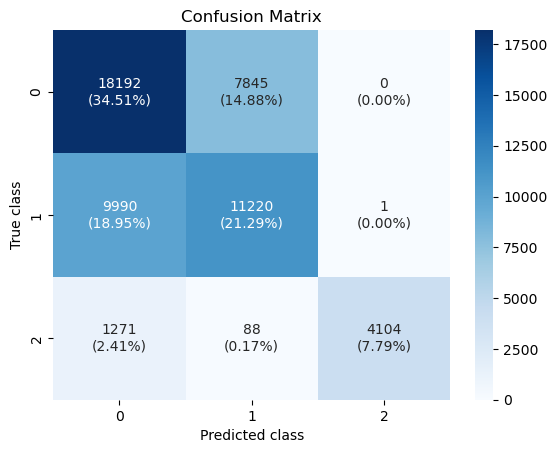


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.62      0.70      0.66     26037
         1.0       0.59      0.53      0.56     21211
         2.0       1.00      0.75      0.86      5463

    accuracy                           0.64     52711
   macro avg       0.73      0.66      0.69     52711
weighted avg       0.64      0.64      0.64     52711

--------------------------------------------------------------------
DecisionTreeClassifier()
accuracy train:  0.9968127490039841
accuracy test:  0.699910834550663


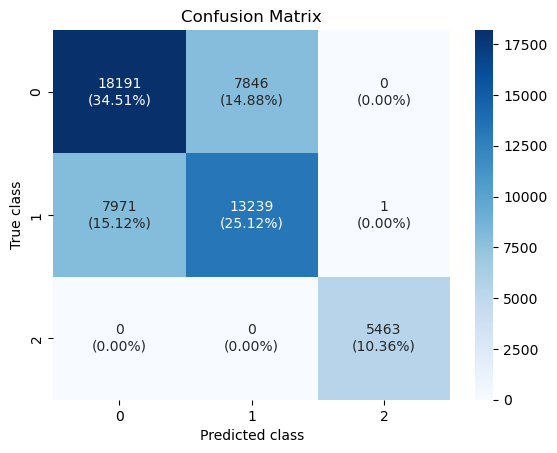


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70     26037
         1.0       0.63      0.62      0.63     21211
         2.0       1.00      1.00      1.00      5463

    accuracy                           0.70     52711
   macro avg       0.77      0.77      0.77     52711
weighted avg       0.70      0.70      0.70     52711

--------------------------------------------------------------------


In [69]:
models = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]

for m in models:
    testModelWithConfusionMatrix(m, X_train, y_train, X_test, y_test)


In [70]:
y.value_counts(normalize=True)

0.0    0.491681
1.0    0.405550
2.0    0.102769
Name: weather_main, dtype: float64

emerge dall'analisi delle confusion matrix che le classi del dataset sono sbilanciate. Questo impata sui modelli, in quanto tenderanno a predire più spesso la classi più frequenti, avendo più esempi per imparare a classificarla.
In questo caso vediamo che i valori più predetti sono 0, 1.


# 2.2

In [71]:
models = [LogisticRegression(), DecisionTreeClassifier()]
for m in models:
    crossValidation(m, 10, X, y)

c:\Users\39379\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\39379\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()
cross validation scores:  [0.50853674 0.51375451 0.50806299 0.50901157 0.51533548 0.51192057
 0.50603933 0.51179409 0.50888509 0.51615759]
Accuracy con incertezza: 0.51 (+/- 0.01)
--------------------------------------------------------------------
DecisionTreeClassifier()
cross validation scores:  [0.71417731 0.70770885 0.7094163  0.71245178 0.71276798 0.71169291
 0.70853096 0.71042813 0.70694998 0.70486309]
Accuracy con incertezza: 0.71 (+/- 0.01)
--------------------------------------------------------------------


 # 2.3

In [79]:

normalizer = Normalizer()
X_norm = normalizer.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = X.columns)
X_norm.head(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h
0,0.254738,0.251850,0.256955,0.893817,0.082139,0.000000,0.000000,0.0,0.0,0.0
1,0.272912,0.272912,0.272912,0.877043,0.040156,0.001825,0.075749,0.0,0.0,0.0


In [73]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=1/3, random_state=0)

In [74]:
testModel(DecisionTreeClassifier(), X_norm_train, y_train, X_norm_test, y_test)

DecisionTreeClassifier()
accuracy train:  0.9968127490039841
accuracy test:  0.6864221889169244
--------------------------------------------------------------------


DecisionTreeClassifier()

# 2.4

In [75]:
# Creare una pipeline con trasformatori PCA (si scelgano 5 attributi) e poi Normalizer. Si usi 
# come modello il  Decision Tree Classifier  (punti 2) [2 punti ulteriori se gli attributi della PCA 
# sono aggiunti agli attributi del dataset

combined_features = FeatureUnion([('pca', PCA(n_components=5)),('original', 'passthrough')])

pipeline = Pipeline(steps=[
                    ('features', combined_features),
                    ('normalizer', Normalizer()),
                    ('model', DecisionTreeClassifier())])

testModel(pipeline, X_train, y_train, X_test, y_test)




Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])
accuracy train:  0.9968127490039841
accuracy test:  0.6962493597161883
--------------------------------------------------------------------


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])

# 2.5

In [76]:
# Utilizzare la funzione di gridSearchCV sulla pipeline per modificare il numero di attributi 
# selezionati dalla PCA e alcuni parametri a piacere del classificatore. Verificare se l’accuratezza 
# che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 1 (punti 4) 

parameter_grid = { 'features__pca__n_components' : [2, 4] , 'model__criterion': [ 'entropy'] }

gridSearch(pipeline, parameter_grid, 5, X_train, y_train, X_test, y_test)

best parameters:  {'features__pca__n_components': 4, 'model__criterion': 'entropy'}
with accuracy:  0.6882375260861318

acc sul train del modello con i parametri ottimizzati:  0.9968127490039841
acc del modello con i parametri ottimizzati: :  0.693100111931096
--------------------------------------------------------------------


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=4)),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier(criterion='entropy'))])

In [100]:
test = pd.read_csv('weather_test.csv')
test.head(2)



,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon
0,0,2015-10-23 18:00:00+02:00,Madrid,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0,0,800,sky is clear,01d
1,1,2015-01-01 06:00:00+01:00,Madrid,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0,0,800,sky is clear,01n


In [101]:
test.drop(['Unnamed: 0'], axis=1, inplace=True)


In [102]:
test.drop(['weather_icon'], axis=1, inplace=True)

In [103]:
test.shape

test_num = categoricalToNumerical(test)

In [104]:
y = pd.read_csv('class.csv')
y.drop(['Unnamed: 0'], axis=1, inplace=True)
print(y.shape)
y.head(2)

(10000, 1)


,weather_main
0,clear
1,clear


In [105]:
combined_features = FeatureUnion([('pca', PCA(n_components=5)),('original', 'passthrough')])

pipeline = Pipeline(steps=[
                    ('features', combined_features),
                    ('normalizer', Normalizer()),
                    ('model', DecisionTreeClassifier())])

testModel(pipeline, X_train, y_train, X_test, y_test)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])
accuracy train:  0.9968127490039841
accuracy test:  0.6965718730435773
--------------------------------------------------------------------


Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])

In [106]:
test_num.drop(['dt_iso','city_name','weather_description','weather_id','clouds_all'], axis=1, inplace=True)


In [107]:
test_num.columns

Index(['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h'],
      dtype='object')

In [96]:
X.columns

Index(['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h'],
      dtype='object')

In [108]:

y_pred = pipeline.predict(test_num)
print('accuracy: ', accuracy_score(y, y_pred))


accuracy:  0.0


In [115]:
# importa linear regressor
from sklearn.linear_model import LinearRegression

In [116]:
combined_features = FeatureUnion([('pca', PCA(n_components=5)),('original', 'passthrough')])

pipeline = Pipeline(steps=[
                    ('features', combined_features),
                    ('normalizer', Normalizer()),
                    ('model', LinearRegression())])
model = pipeline
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred e y_pred_train li e approssimato all’intero piu vicino per il calcolo dell’accuratezza

y_pred


array([0.72141007, 0.62888078, 0.47873429, ..., 0.26584367, 0.47678117,
       0.68698624])

In [117]:
y_pred_train = np.rint(y_pred_train)
y_pred = np.rint(y_pred)

y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [118]:
print(model)
print('accuracy train: ', accuracy_score(y_train, y_pred_train))
print('accuracy test: ', accuracy_score(y_test, y_pred))
print('--------------------------------------------------------------------')    

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=5)),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('normalizer', Normalizer()), ('model', LinearRegression())])
accuracy train:  0.5621324226901916
accuracy test:  0.5602056496746409
--------------------------------------------------------------------
